# Header

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
import category_encoders  as ce 
from sklearn.naive_bayes import GaussianNB



In [113]:
def classification_metrics(y_test,y_pred):
    print("Accuracy is: ", accuracy_score(y_test,y_pred))
    print("Precision is: ", precision_score(y_test,y_pred))
    print("Recall is: ", recall_score(y_test,y_pred))
    print("F1-Score is: ", f1_score(y_test,y_pred))

In [7]:
adult=pd.read_csv('adult.csv',header=None, sep=',\s')

C:\Users\user\AppData\Local\Temp\ipykernel_13840\2532994133.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult=pd.read_csv('adult.csv',header=None, sep=',\s')


In [8]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [10]:
adult.columns=col_names

In [11]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
adult.shape

(32561, 15)

In [13]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [14]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [20]:
categorical_features=[col for col in adult.columns if adult[col].dtype=='O']  #perdorim for per t gjetur emrat e kolonave me vlera kategorike dhe numerike 
numerical_features=[col for col in adult.columns if adult[col].dtype=='int64'] #ose dtype!='O'


In [18]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [22]:
adult.workclass.value_counts() #shikojme vlerat brenda 1 kolone 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [24]:
for col in categorical_features:
    print(adult[col].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [21]:
numerical_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [26]:
len(adult['income'].unique()) #sa vlera ka nje liste 

2

In [28]:
for  col in categorical_features:
    print("Number of lables for", col.capitalize(),"is", len(adult[col].unique()))

Number of lables for Workclass is 9
Number of lables for Education is 16
Number of lables for Marital_status is 7
Number of lables for Occupation is 15
Number of lables for Relationship is 6
Number of lables for Race is 5
Number of lables for Sex is 2
Number of lables for Native_country is 42
Number of lables for Income is 2


# Missing Values

In [29]:
#Replace "?" with NaN value
for col in categorical_features:
    adult[col].replace('?',np.NaN,inplace=True)

In [30]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [32]:
adult['income'].mode()[0]  #gjejme moden 

'<=50K'

# Categorical Features

In [33]:
#zevendesojme Nan Values with mode of the column where we have Nan Values 

for col in categorical_features:
    adult[col].fillna(adult[col].mode()[0],inplace=True)

In [34]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [36]:
adult.groupby(["income","sex"]).count().age.reset_index()

,income,sex,age
0,<=50K,Female,9592
1,<=50K,Male,15128
2,>50K,Female,1179
3,>50K,Male,6662


In [37]:
for col in categorical_features:
    print(adult.groupby(["income",col]).count().age.reset_index())

   income         workclass    age
0   <=50K       Federal-gov    589
1   <=50K         Local-gov   1476
2   <=50K      Never-worked      7
3   <=50K           Private  19378
4   <=50K      Self-emp-inc    494
5   <=50K  Self-emp-not-inc   1817
6   <=50K         State-gov    945
7   <=50K       Without-pay     14
8    >50K       Federal-gov    371
9    >50K         Local-gov    617
10   >50K           Private   5154
11   >50K      Self-emp-inc    622
12   >50K  Self-emp-not-inc    724
13   >50K         State-gov    353
   income     education   age
0   <=50K          10th   871
1   <=50K          11th  1115
2   <=50K          12th   400
3   <=50K       1st-4th   162
4   <=50K       5th-6th   317
5   <=50K       7th-8th   606
6   <=50K           9th   487
7   <=50K    Assoc-acdm   802
8   <=50K     Assoc-voc  1021
9   <=50K     Bachelors  3134
10  <=50K     Doctorate   107
11  <=50K       HS-grad  8826
12  <=50K       Masters   764
13  <=50K     Preschool    51
14  <=50K   Prof-school  

ValueError: cannot insert income, already exists

# Numerical Features

In [39]:
adult[numerical_features].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [42]:
for col in numerical_features:
    print(adult[col].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64
40    15217
50     2819
45     18

In [45]:
for col in numerical_features:
    print(col.capitalize(),"has",adult[adult[col]=='?'].shape[0], "missing values")

Age has 0 missing values
Fnlwgt has 0 missing values
Education_num has 0 missing values
Capital_gain has 0 missing values
Capital_loss has 0 missing values
Hours_per_week has 0 missing values


In [46]:
adult[numerical_features].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [47]:
adult[numerical_features].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [49]:
adult[adult['age']>48].shape

(7639, 15)

In [51]:
adult[adult['age']>48].age.value_counts()

50    602
51    595
49    577
52    478
53    464
55    419
54    415
56    366
58    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
88      3
85      3
86      1
87      1
Name: age, dtype: int64

In [52]:
adult[adult.age>=80]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,Private,107762,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1168,88,Self-emp-not-inc,206291,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32494,82,Private,403910,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,3,United-States,<=50K


In [90]:
x=adult.drop("income",axis=1)
y=adult["income"]

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 14)
(6513, 14)
(26048,)
(6513,)


In [93]:
y_test.value_counts(normalize=True)

<=50K    0.75879
>50K     0.24121
Name: income, dtype: float64

In [94]:
y_train.value_counts(normalize=True)

<=50K    0.759291
>50K     0.240709
Name: income, dtype: float64

In [95]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [96]:
x_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
5514,33,1,0,0,0,0,0,0,0,198183,...,0,0,0,0,0,0,0,0,0,0
19777,36,0,1,0,0,0,0,0,0,86459,...,0,0,0,0,0,0,0,0,0,0
10781,58,0,0,1,0,0,0,0,0,203039,...,0,0,0,0,0,0,0,0,0,0
32240,21,0,1,0,0,0,0,0,0,180190,...,0,0,0,0,0,0,0,0,0,0
9876,27,0,1,0,0,0,0,0,0,279872,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,0,1,0,0,0,0,0,0,359461,...,0,0,0,0,0,0,0,0,0,0
5390,31,0,1,0,0,0,0,0,0,147215,...,0,0,0,0,0,0,0,0,0,0
860,18,0,1,0,0,0,0,0,0,216284,...,0,0,0,0,0,0,0,0,0,0
15795,50,0,0,1,0,0,0,0,0,54261,...,0,0,0,0,0,0,0,0,0,0


In [97]:
col_names=x_train.columns

In [98]:
#perdorim RobustScaler dhe jo standartscaler apo normalizescaler, duke qene se Robustscaler nuk ndikohet nga outliers
#Formula:(X-Q2)/(Q3-Q1)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [99]:
x_train

array([[-0.2 ,  1.  , -1.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.05,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.05,  0.  , -1.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.95,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.65,  0.  , -1.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.15,  0.  , -1.  , ...,  0.  ,  0.  ,  0.  ]])

In [100]:
x_test

array([[-0.5 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.4 ,  0.  , -1.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.4 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.5 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.5 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.95,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [101]:
#e kthejme nga array  ne DataFrame 
x_train=pd.DataFrame(x_train,columns=col_names)
x_test=pd.DataFrame(x_test,columns=col_names)

In [102]:
x_test.shape

(6513, 105)

In [103]:
x_train.shape

(26048, 105)

In [105]:
x_train.age.max()

2.65

In [106]:
x_train.age.min()

-1.0

In [107]:
y_train=y_train.map({'<=50K':0,'>50K':1})
y_test=y_test.map({'<=50K':0,'>50K':1})

# Naiv Bayes Model

In [110]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [111]:
y_pred=model.predict(x_test)

In [114]:
classification_metrics(y_test,y_pred)

Accuracy is:  0.804544756640565
Precision is:  0.5651223776223776
Recall is:  0.8230426479949077
F1-Score is:  0.6701217932106763


<AxesSubplot:>

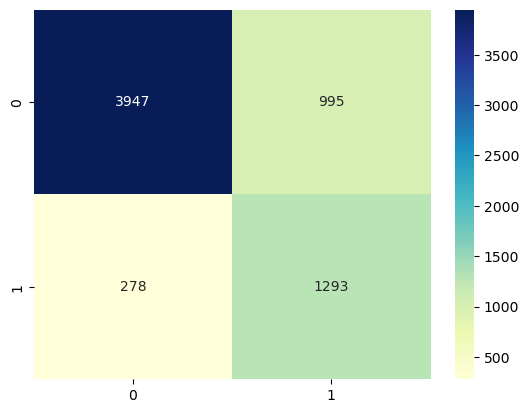

In [116]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='YlGnBu')


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4942
           1       0.57      0.82      0.67      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.81      0.77      6513
weighted avg       0.85      0.80      0.82      6513



In [117]:
y_pred_train=model.predict(x_train)


In [118]:
classification_metrics(y_train,y_pred_train)

Accuracy is:  0.7979883292383292
Precision is:  0.554368932038835
Recall is:  0.8196172248803828
F1-Score is:  0.6613899613899614


# ROC

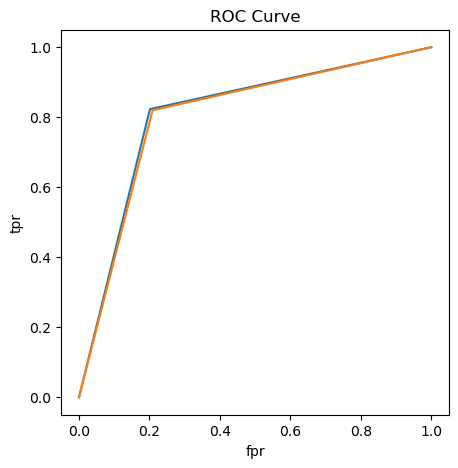

In [120]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()